In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pickle

In [2]:
# Loading dataset
diabetes_data = pd.read_csv("datasets_228_482_diabetes.csv")

In [3]:
# Exploring the dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Access information about the dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Print summary statistics of the dataset to understand its distribution and scale
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Check for missing values
diabetes_data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Now let's handle the erroneous data in features like Glucose, BloodPressure, SkinThickness, and Insulin by replacing the 0's to its mean.

# Initialize SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Replace zeros with NaN
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, float('nan'))

# Impute zeros with the mean
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

In [8]:
# Show the updated summary statistics of the dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Count the occurrences of different classes in the "Outcome" column
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

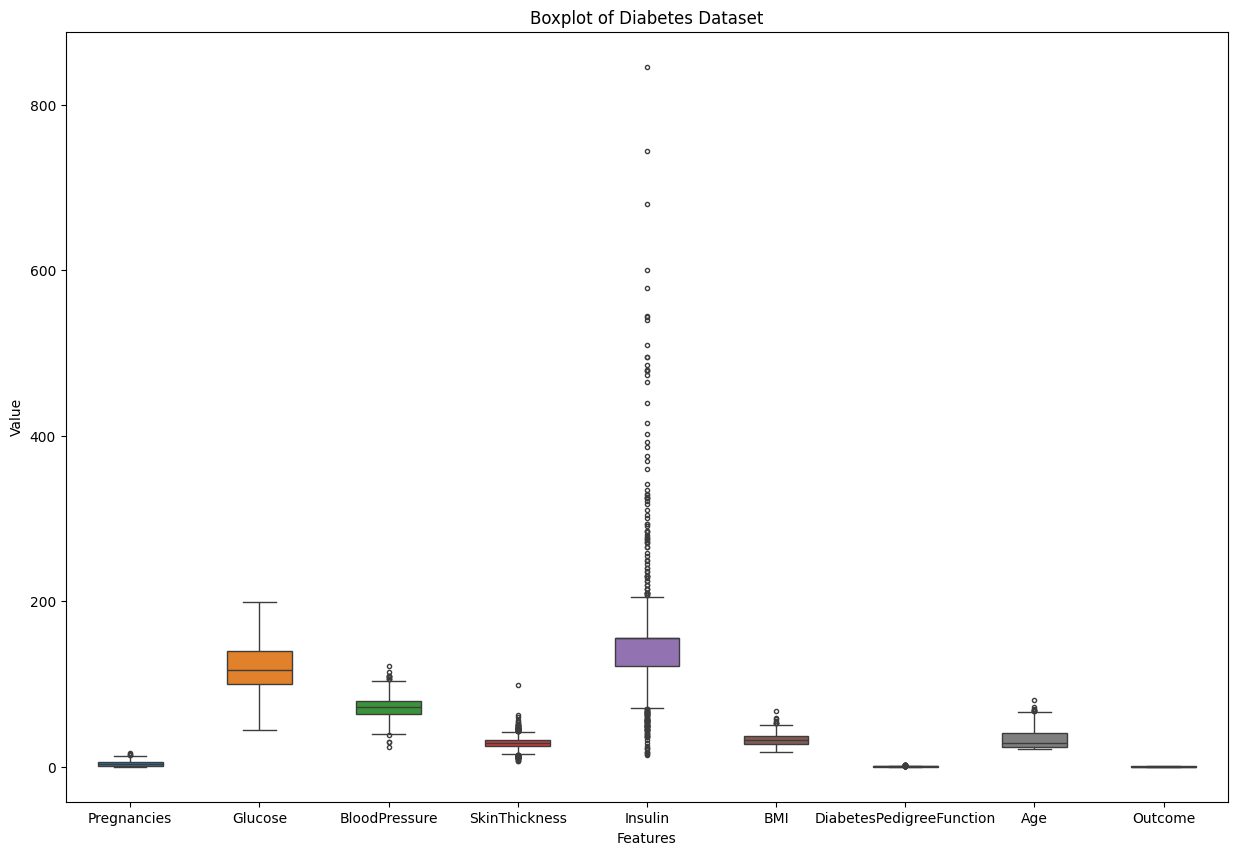

In [10]:
# Despite addressing the issue of zero values, the data appears improved. However, there still exist outliers in certain columns. Let's visualize these outliers.
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=diabetes_data, width=0.5, ax=ax, fliersize=3)

# Adding the title and labels
ax.set_title('Boxplot of Diabetes Dataset')
ax.set_ylabel('Value')
ax.set_xlabel('Features')

# Show the plot
plt.show()

In [11]:
# Split dataset into features and target variable
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1 Score: 0.6415094339622642
ROC AUC Score: 0.7232323232323232


In [13]:
# Interpret the model coefficients
coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
print(coefficients)

                          Coefficient
Pregnancies                  0.228737
Glucose                      1.095331
BloodPressure               -0.145340
SkinThickness                0.071388
Insulin                     -0.094892
BMI                          0.673791
DiabetesPedigreeFunction     0.196784
Age                          0.403497


In [14]:
# Save the logistic regression model to a pickle file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(scaler, file)
# Now, let's tune the model
# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term
}
# Instantiate GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [15]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}


In [16]:
# Use the best parameters to build the Logistic Regression model
best_log_reg = LogisticRegression(**best_params)
best_log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [17]:
# Evaluate the model after hyperparameter tuning
y_pred = best_log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7662337662337663
Precision: 0.6938775510204082
Recall: 0.6181818181818182
F1 Score: 0.6538461538461539
ROC AUC Score: 0.7333333333333334


In [18]:
# Interpret the model coefficients
coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
print(coefficients)

                          Coefficient
Pregnancies                  0.228737
Glucose                      1.095331
BloodPressure               -0.145340
SkinThickness                0.071388
Insulin                     -0.094892
BMI                          0.673791
DiabetesPedigreeFunction     0.196784
Age                          0.403497


In [19]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[84 15]
 [21 34]]
